In [53]:
import os
import numpy as np
import pandas as pd

file_path = './test_results.xlsx'

df_raw = pd.read_excel(file_path, engine='openpyxl')
df_raw = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]

In [2]:
pivot_index = list(df_raw.columns[0:18]) # accuracy 전까지
pivot_index.remove('drift_model')
pivot_index.remove('n_rep')
pivot_index.remove('pruning')
pivot_index.remove('Gmax')
pivot_index.remove('Gmin')
pivot_index.remove('retrain')
pivot_index

['model',
 'dataset',
 'device',
 'IOparameter',
 'GDC',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'G_ratio',
 'inf_time']

In [54]:
df = df_raw.copy()

In [55]:
df = df[df['G_ratio']==25]
df = df[df['model']=='Resnet18']
df = df[df['GDC'] == 'on']
df = df[df['IOparameter'] == 'ideal']
df = df[df['pgm_noise_scale'] == 1]

In [47]:
df['pruning'].unique()

array(['-', 0.3, 0.4, 0.5, 0.6, 0.7], dtype=object)

In [56]:
df['p_drift'] = df['pruning'].astype(str) + '_' + df['drift_model'].astype(str)

In [39]:
df['drift_model'].unique()

array(['log', 'linear', 0.01, 0.1], dtype=object)

In [40]:
df['p_drift'].unique()

array(['-_log', '-_linear', '-_0.01', '-_0.1', '0.3_log', '0.4_log',
       '0.5_log', '0.6_log', '0.7_log', '0.3_linear', '0.4_linear',
       '0.5_linear', '0.6_linear', '0.7_linear', '0.3_0.01', '0.4_0.01',
       '0.5_0.01', '0.6_0.01', '0.7_0.01', '0.3_0.1', '0.4_0.1',
       '0.5_0.1', '0.6_0.1', '0.7_0.1'], dtype=object)

In [152]:
df2 = df[(df['drift_model'] == 0.01)  | (df['drift_model'] == 'log')]
df2 = df2[(df['pruning'] == '-')  | (df2['pruning'] == 0.5)]

/tmp/ipykernel_30715/2206156557.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[(df['pruning'] == '-')  | (df2['pruning'] == 0.5)]


In [153]:
df2['p_drift'].unique()

array(['0.5_log', '-_log', '-_0.01', '0.5_0.01'], dtype=object)

In [57]:
df_pivot = df.pivot_table(index=pivot_index, columns='p_drift', values='accuracy', aggfunc='mean')
df_pivot.reset_index(inplace=True) # index to columns

In [11]:
df_pivot

p_drift,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,...,0.5_linear,0.5_log,0.6_0.01,0.6_0.1,0.6_linear,0.6_log,0.7_0.01,0.7_0.1,0.7_linear,0.7_log
0,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,87.059998,87.059998,81.43,81.43,81.43,81.43,42.099998,42.099998,42.099998,42.099998
1,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,88.290001,88.260002,79.5,79.459999,79.300003,79.550003,46.459999,46.5,46.07,46.32
2,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,89.010002,89.050003,81.589996,81.809998,81.209999,81.68,42.240002,42.759998,41.18,41.98
3,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,86.480003,86.970001,81.760002,82.190002,80.089996,81.040001,42.68,43.57,40.41,40.939999
4,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,86.839996,87.029999,80.790001,80.760002,76.989998,78.610001,44.639999,46.09,40.57,41.84
5,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,83.260002,83.949997,81.440002,81.519997,77.589996,79.029999,38.959999,40.73,35.119999,35.689999
6,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,81.68,82.760002,79.989998,80.860001,73.190002,74.870003,46.07,46.639999,40.57,41.32
7,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,73.919998,76.779999,80.849998,81.099998,69.400002,71.660004,41.5,45.0,34.639999,34.029999
8,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,67.309998,71.209999,76.889999,78.040001,62.189999,63.610001,42.330002,44.790001,34.279999,33.48
9,Resnet18,CIFAR10,PCMPresetUnitCell,ideal,on,1,TestNoiseModel,1,1,1,...,66.599998,70.360001,78.419998,77.669998,58.200001,59.759998,40.610001,42.290001,33.889999,32.630001


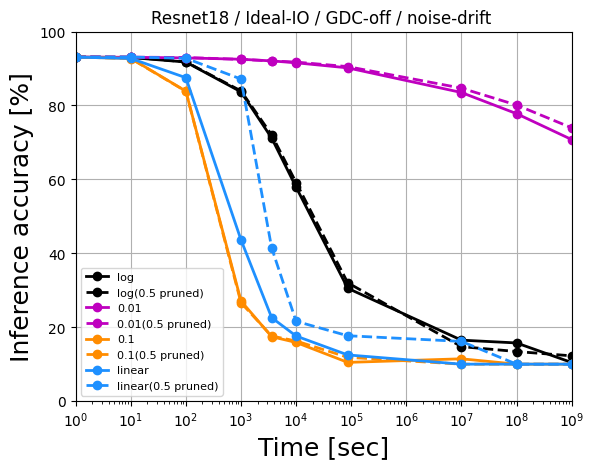

In [67]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_log'], marker='o', label = 'log', linewidth=2, color='k')
plt.plot(x,df_pivot['0.5_log'], marker='o', label = 'log(0.5 pruned)', linestyle='--', linewidth=2, color='k')
plt.plot(x,df_pivot['-_0.01'], marker='o', label = '0.01', linewidth=2, color='m')
plt.plot(x,df_pivot['0.5_0.01'], marker='o', label = '0.01(0.5 pruned)', linestyle='--',linewidth=2, color='m')
plt.plot(x,df_pivot['-_0.1'], marker='o', label = '0.1', linewidth=2, color='darkorange')
plt.plot(x,df_pivot['0.5_0.1'], marker='o', label = '0.1(0.5 pruned)', linestyle='--',linewidth=2, color='darkorange')
plt.plot(x,df_pivot['-_linear'], marker='o', label = 'linear', linewidth=2, color='dodgerblue')
plt.plot(x,df_pivot['0.5_linear'], marker='o', label = 'linear(0.5 pruned)', linestyle='--',linewidth=2, color='dodgerblue')


plt.title("Resnet18 / Ideal-IO / GDC-off / noise-drift ")
plt.legend(fontsize=8, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

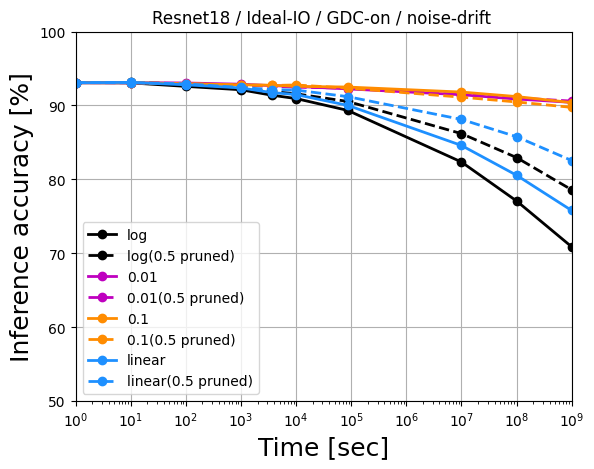

In [47]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_log'], marker='o', label = 'log', linewidth=2, color='k')
plt.plot(x,df_pivot['0.5_log'], marker='o', label = 'log(0.5 pruned)', linestyle='--', linewidth=2, color='k')
plt.plot(x,df_pivot['-_0.01'], marker='o', label = '0.01', linewidth=2, color='m')
plt.plot(x,df_pivot['0.5_0.01'], marker='o', label = '0.01(0.5 pruned)', linestyle='--',linewidth=2, color='m')
plt.plot(x,df_pivot['-_0.1'], marker='o', label = '0.1', linewidth=2, color='darkorange')
plt.plot(x,df_pivot['0.5_0.1'], marker='o', label = '0.1(0.5 pruned)', linestyle='--',linewidth=2, color='darkorange')
plt.plot(x,df_pivot['-_linear'], marker='o', label = 'linear', linewidth=2, color='dodgerblue')
plt.plot(x,df_pivot['0.5_linear'], marker='o', label = 'linear(0.5 pruned)', linestyle='--',linewidth=2, color='dodgerblue')


plt.title("Resnet18 / Ideal-IO / GDC-on / noise-drift ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(50,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

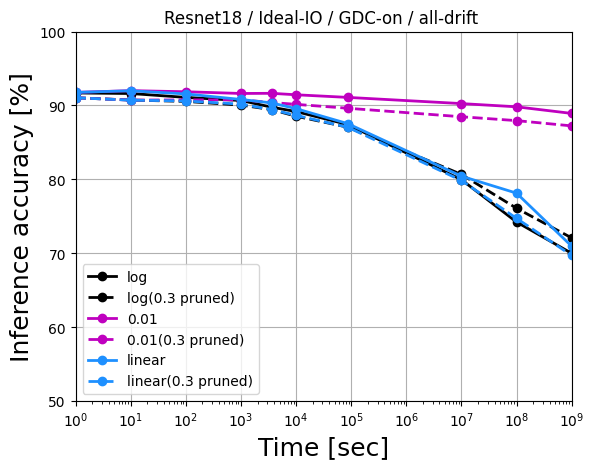

In [65]:
import matplotlib.pyplot as plt

x = df_pivot['inf_time']

plt.grid(True)

plt.plot(x,df_pivot['-_log'], marker='o', label = 'log', linewidth=2, color='k')
plt.plot(x,df_pivot['0.3_log'], marker='o', label = 'log(0.3 pruned)', linestyle='--', linewidth=2, color='k')
# plt.plot(x,df_pivot['0.4_log'], marker='o', label = 'log(0.4 pruned)', linestyle='--', linewidth=2, color='k')
# plt.plot(x,df_pivot['0.5_log'], marker='o', label = 'log(0.5 pruned)', linestyle='--', linewidth=2)

plt.plot(x,df_pivot['-_0.01'], marker='o', label = '0.01', linewidth=2, color='m')
plt.plot(x,df_pivot['0.3_0.01'], marker='o', label = '0.01(0.3 pruned)', linestyle='--',linewidth=2, color='m')
# plt.plot(x,df_pivot['0.4_0.01'], marker='o', label = '0.01(0.4 pruned)', linestyle='--',linewidth=2, color='m')
# plt.plot(x,df_pivot['0.5_0.01'], marker='o', label = '0.01(0.5 pruned)', linestyle='--',linewidth=2)

# plt.plot(x,df_pivot['-_0.1'], marker='o', label = '0.1', linewidth=2, color='darkorange')
# # plt.plot(x,df_pivot['0.3_0.1'], marker='o', label = '0.1(0.3 pruned)', linestyle='--',linewidth=2, color='darkorange')
# plt.plot(x,df_pivot['0.4_0.1'], marker='o', label = '0.1(0.4 pruned)', linestyle='--',linewidth=2, color='darkorange')
# plt.plot(x,df_pivot['0.5_0.1'], marker='o', label = '0.1(0.5 pruned)', linestyle='--',linewidth=2)

plt.plot(x,df_pivot['-_linear'], marker='o', label = 'linear', linewidth=2, color='dodgerblue')
plt.plot(x,df_pivot['0.3_linear'], marker='o', label = 'linear(0.3 pruned)', linestyle='--',linewidth=2, color='dodgerblue')
# plt.plot(x,df_pivot['0.4_linear'], marker='o', label = 'linear(0.4 pruned)', linestyle='--',linewidth=2, color='dodgerblue')
# plt.plot(x,df_pivot['0.5_linear'], marker='o', label = 'linear(0.5 pruned)', linestyle='--',linewidth=2)
# plt.plot(x,df_pivot['0.6_linear'], marker='o', label = 'linear(0.6 pruned)', linestyle='--',linewidth=2)


plt.title("Resnet18 / Ideal-IO / GDC-on / all-drift ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(50,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

In [154]:
df2_pivot = df2.pivot_table(index=pivot_index, columns='p_drift', values='accuracy', aggfunc='mean')
df2_pivot.reset_index(inplace=True) # index to columns

In [155]:
df2_pivot = df2_pivot[df2_pivot['pgm_noise_scale']==0]
df2_pivot

p_drift,model,dataset,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,G_ratio,inf_time,-_0.01,-_log,0.5_0.01,0.5_log
0,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,0,0,1,25,1,92.772995,92.713005,90.396004,90.479004
1,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,0,0,1,25,10,92.764999,92.785995,90.367996,90.287003
2,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,0,0,1,25,100,92.761002,92.678009,90.327003,89.740005
3,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,0,0,1,25,1000,92.712997,92.220993,90.180008,88.173996
4,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,0,0,1,25,3600,92.629005,91.718002,90.057999,86.831993
5,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,0,0,1,25,10000,92.564003,91.280006,89.891006,85.556992
6,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,0,0,1,25,86400,92.373001,89.918007,89.625,81.638
7,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,0,0,1,25,10000000,91.795998,83.099007,88.686005,67.23999
8,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,0,0,1,25,100000000,91.334,76.283997,88.108994,56.940002
9,Resnet18,CIFAR10,PCMPresetUnitCell,non-ideal,on,1,TestNoiseModel,0,0,1,25,1000000000,90.669998,66.248001,87.539993,42.875999


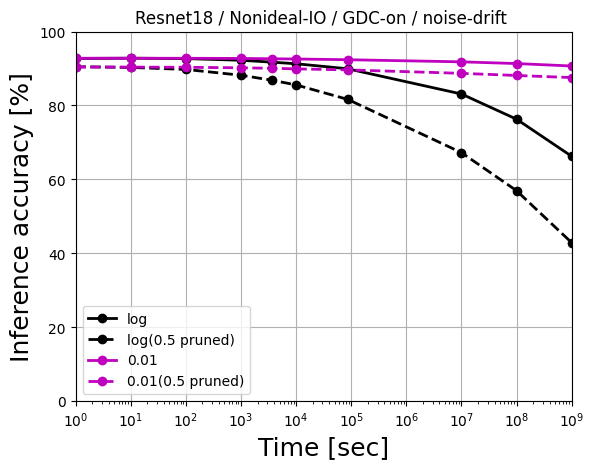

In [159]:
import matplotlib.pyplot as plt

x = df2_pivot['inf_time']

plt.grid(True)

plt.plot(x,df2_pivot['-_log'], marker='o', label = 'log', linewidth=2, color='k')
plt.plot(x,df2_pivot['0.5_log'], marker='o', label = 'log(0.5 pruned)', linestyle='--', linewidth=2, color='k')
plt.plot(x,df2_pivot['-_0.01'], marker='o', label = '0.01', linewidth=2, color='m')
plt.plot(x,df2_pivot['0.5_0.01'], marker='o', label = '0.01(0.5 pruned)', linestyle='--',linewidth=2, color='m')
# plt.plot(x,df2_pivot['-_0.1'], marker='o', label = '0.1', linewidth=2, color='darkorange')
# plt.plot(x,df2_pivot['0.5_0.1'], marker='o', label = '0.1(0.5 pruned)', linestyle='--',linewidth=2, color='darkorange')
# plt.plot(x,df2_pivot['-_linear'], marker='o', label = 'linear', linewidth=2, color='dodgerblue')
# plt.plot(x,df2_pivot['0.5_linear'], marker='o', label = 'linear(0.5 pruned)', linestyle='--',linewidth=2, color='dodgerblue')


plt.title("Resnet18 / Nonideal-IO / GDC-on / noise-drift ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

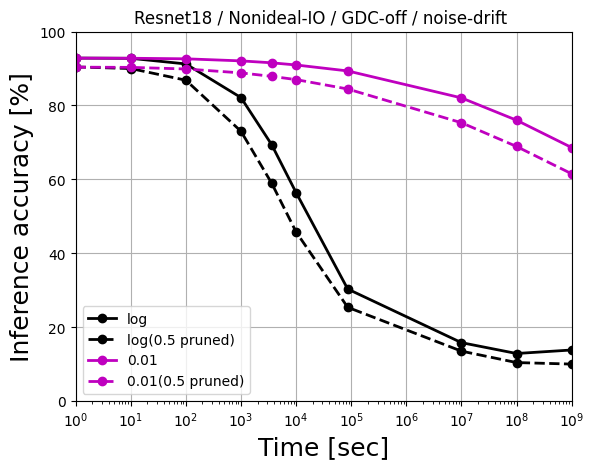

In [87]:
import matplotlib.pyplot as plt

x = df2_pivot['inf_time']

plt.grid(True)

plt.plot(x,df2_pivot['-_log'], marker='o', label = 'log', linewidth=2, color='k')
plt.plot(x,df2_pivot['0.5_log'], marker='o', label = 'log(0.5 pruned)', linestyle='--', linewidth=2, color='k')
plt.plot(x,df2_pivot['-_0.01'], marker='o', label = '0.01', linewidth=2, color='m')
plt.plot(x,df2_pivot['0.5_0.01'], marker='o', label = '0.01(0.5 pruned)', linestyle='--',linewidth=2, color='m')
# plt.plot(x,df2_pivot['-_0.1'], marker='o', label = '0.1', linewidth=2, color='darkorange')
# plt.plot(x,df2_pivot['0.5_0.1'], marker='o', label = '0.1(0.5 pruned)', linestyle='--',linewidth=2, color='darkorange')
# plt.plot(x,df2_pivot['-_linear'], marker='o', label = 'linear', linewidth=2, color='dodgerblue')
# plt.plot(x,df2_pivot['0.5_linear'], marker='o', label = 'linear(0.5 pruned)', linestyle='--',linewidth=2, color='dodgerblue')


plt.title("Resnet18 / Nonideal-IO / GDC-off / noise-drift ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(0,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()

In [117]:
import os
import numpy as np
import pandas as pd

file_path = './test_results.xlsx'

df_msr = pd.read_excel(file_path, engine='openpyxl')
df_msr = df_raw.loc[:, ~df_raw.columns.str.contains("Unnamed:")]

In [118]:
df_msr = df_msr[df_msr['drift_model']=='msr']
# df_msr = df_msr[df_msr['model']=='MLP']
df_msr = df_msr[df_msr['pgm_noise_scale']==1]
df_msr['model_GDC'] = df_msr['model'] + '_' + df_msr['GDC'].astype(str)
df_msr

,model,dataset,pruning,retrain,device,IOparameter,GDC,mapping_scaling_omega,noise_model,pgm_noise_scale,...,drift_scale,drift_model,Gmax,Gmin,G_ratio,n_rep,inf_time,accuracy,std,model_GDC
2839,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,...,1,msr,15.3296,0.0935,163.952941,10,1,92.457001,1.657822,MLP_off
2840,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,...,1,msr,15.3296,0.0935,163.952941,10,10,92.929001,1.154473,MLP_off
2841,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,...,1,msr,15.3296,0.0935,163.952941,10,100,93.848999,0.822481,MLP_off
2842,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,...,1,msr,15.3296,0.0935,163.952941,10,1000,93.192001,0.933163,MLP_off
2843,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,...,1,msr,15.3296,0.0935,163.952941,10,3600,93.17601,0.685601,MLP_off
2844,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,...,1,msr,15.3296,0.0935,163.952941,10,10000,92.332993,1.05233,MLP_off
2845,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,...,1,msr,15.3296,0.0935,163.952941,10,86400,93.001991,0.569498,MLP_off
2846,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,...,1,msr,15.3296,0.0935,163.952941,10,10000000,91.834,1.036534,MLP_off
2847,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,...,1,msr,15.3296,0.0935,163.952941,10,100000000,91.384995,1.169086,MLP_off
2848,MLP,MNIST,-,X,PCMPresetUnitCell,non-ideal,off,1,TestNoiseModel,1,...,1,msr,15.3296,0.0935,163.952941,10,1000000000,90.686005,0.914127,MLP_off


In [121]:
index_msr = pivot_index
# index_msr.remove('GDC')
index_msr.remove('model')
index_msr.remove('dataset')
index_msr

['device',
 'IOparameter',
 'mapping_scaling_omega',
 'noise_model',
 'pgm_noise_scale',
 'read_noise_scale',
 'drift_scale',
 'G_ratio',
 'inf_time']

In [122]:
df_msr_p = df_msr.pivot_table(index=index_msr, columns='model_GDC', values='accuracy', aggfunc='mean')
df_msr_p.reset_index(inplace=True) # index to columns
df_msr_p

model_GDC,device,IOparameter,mapping_scaling_omega,noise_model,pgm_noise_scale,read_noise_scale,drift_scale,G_ratio,inf_time,MLP_off,MLP_on,Resnet18_off,Resnet18_on
0,PCMPresetUnitCell,non-ideal,1,TestNoiseModel,1,1,1,163.952941,1,92.457001,92.528,91.417,91.316994
1,PCMPresetUnitCell,non-ideal,1,TestNoiseModel,1,1,1,163.952941,10,92.929001,92.773003,91.542992,91.588997
2,PCMPresetUnitCell,non-ideal,1,TestNoiseModel,1,1,1,163.952941,100,93.848999,93.793007,91.202003,91.414001
3,PCMPresetUnitCell,non-ideal,1,TestNoiseModel,1,1,1,163.952941,1000,93.192001,93.189995,89.965004,91.033997
4,PCMPresetUnitCell,non-ideal,1,TestNoiseModel,1,1,1,163.952941,3600,93.17601,93.070999,89.275002,91.138
5,PCMPresetUnitCell,non-ideal,1,TestNoiseModel,1,1,1,163.952941,10000,92.332993,92.473991,87.767998,90.720993
6,PCMPresetUnitCell,non-ideal,1,TestNoiseModel,1,1,1,163.952941,86400,93.001991,93.032005,85.354004,90.254005
7,PCMPresetUnitCell,non-ideal,1,TestNoiseModel,1,1,1,163.952941,10000000,91.834,91.694,73.822006,88.784004
8,PCMPresetUnitCell,non-ideal,1,TestNoiseModel,1,1,1,163.952941,100000000,91.384995,91.491989,65.953003,88.225998
9,PCMPresetUnitCell,non-ideal,1,TestNoiseModel,1,1,1,163.952941,1000000000,90.686005,90.726997,59.109997,86.811996


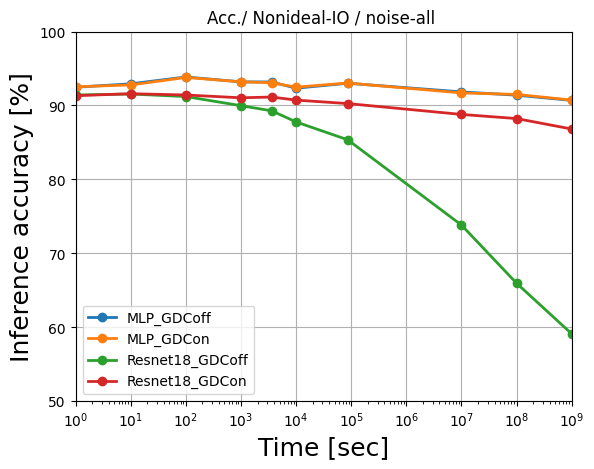

In [130]:
import matplotlib.pyplot as plt

x = df_msr_p['inf_time']

plt.grid(True)

plt.plot(x,df_msr_p['MLP_off'], marker='o', label = 'MLP_GDCoff', linewidth=2)
plt.plot(x,df_msr_p['MLP_on'], marker='o', label = 'MLP_GDCon', linewidth=2)
plt.plot(x,df_msr_p['Resnet18_off'], marker='o', label = 'Resnet18_GDCoff', linewidth=2)
plt.plot(x,df_msr_p['Resnet18_on'], marker='o', label = 'Resnet18_GDCon', linewidth=2)

plt.title("Acc./ Nonideal-IO / noise-all ")
plt.legend(fontsize=10, loc='lower left', bbox_to_anchor=(0.0, 0.0))
plt.xlabel('Time [sec]',fontsize=18)  
plt.ylabel('Inference accuracy [%]', fontsize=18) #, fontweight='demi'
# plt.xticks(fontsize/14)

plt.ylim(50,100)
plt.xlim(1,1000000000)
plt.xscale('log')
plt.show()